# **1. Import Necessary Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load the Dataset**

In [70]:
# Load the dataset
file_path = r'C:\Users\yanks\Desktop\Springboard\Unit 18 Capstone 2 Project\processed_data\cleaned_TelecomCxChurn.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **3. Data Profiles and Tables**

In [49]:
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [77]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observations and Insights:

SeniorCitizen is a categorical variable hence the 25%-50%-75% distribution is not proper. 75% of customers have a tenure of fewer than 55 months. Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month.

In [78]:
# Check distrubtion of the target variable 'Churn'.
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

The dataset is extremely unbalanced; that is, many devoted customers of the telecom service provider (the "No" category customers) are not switching to the competitor's offering. In order to gain some insights, we examine the data using additional features while calculating the goal values independently.

Let's now examine the data frame to see if any missing values exist. We accomplish this by using the df.isnull().sum() method, which determines that the data frame has no missing values.

**3.1 Descriptive Statisitics**

In [79]:
# Descriptive statistics for all columns
print(df.describe(include='all'))

# Checking data types and missing values
print(df.info())
print(df.isnull().sum())

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [80]:
df = df.copy()
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**3.2 Correlation Matrix**

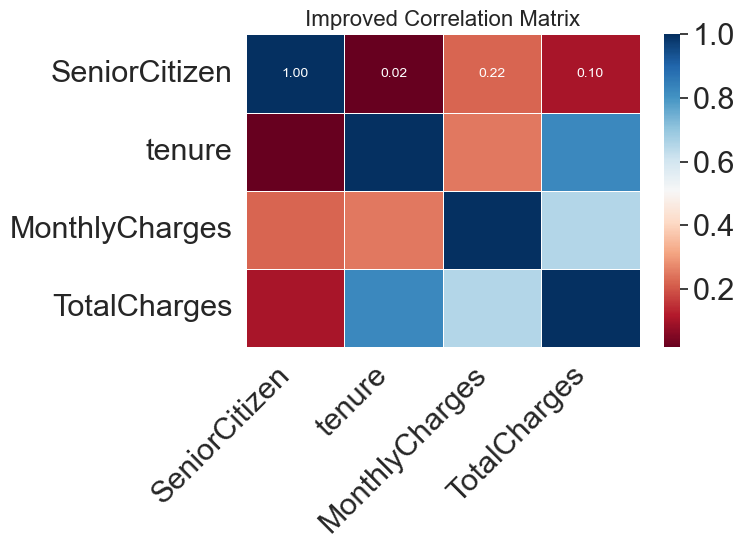

In [83]:
# Correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f",  # Limit decimal places
            cmap='RdBu',  # Diverging color palette
            linewidths=0.5,  # Add gridlines
            annot_kws={"size": 10})  # Adjust annotation font size
plt.title("Improved Correlation Matrix", fontsize=16)  # Better title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

**3.3 Grouped Statistics**

In [84]:
# Convert 'Churn' to numeric if needed
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by 'Churn' and calculate mean for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df.groupby('Churn')[numeric_cols].mean())

       SeniorCitizen     tenure  MonthlyCharges  TotalCharges  Churn
Churn                                                               
0           0.128721  37.569965       61.265124   2554.765772    0.0
1           0.254682  17.979133       74.441332   1531.796094    1.0


**Observations and Insights:**

SeniorCitizen:

Compared to the churn group (0.2546), the non-churn group's mean SeniorCitizen value (0.1287) is substantially lower.
This implies that older consumers are more prone to leave than younger ones.

Tenure:

Customers who churn have a significantly shorter average duration (17.98 months) than those who do not (37.57 months).
This suggests that longer-tenured customers are less likely to leave, underscoring the significance of keeping clients in the beginning of their lives.

Monthly Fees:

The average monthly costs of churning customers are greater (74.44) than those of non-churning customers (61.27).
This may indicate that increased expenses could be a role in the turnover of customers.

Total Charges:

It's interesting to note that consumers that churn have lower total costs (1531.80) than those who do not (2554.77).
This is probably because churning clients typically have shorter tenures and, as a result, accrue fewer costs overall.

# **4 Explore Data Relationships with Visualizations**

**4.1 Senior Citizens vs. Churn**
Key Features to focus on: Senior Citizen, Tenure, Monthly Charges, Total charges. 

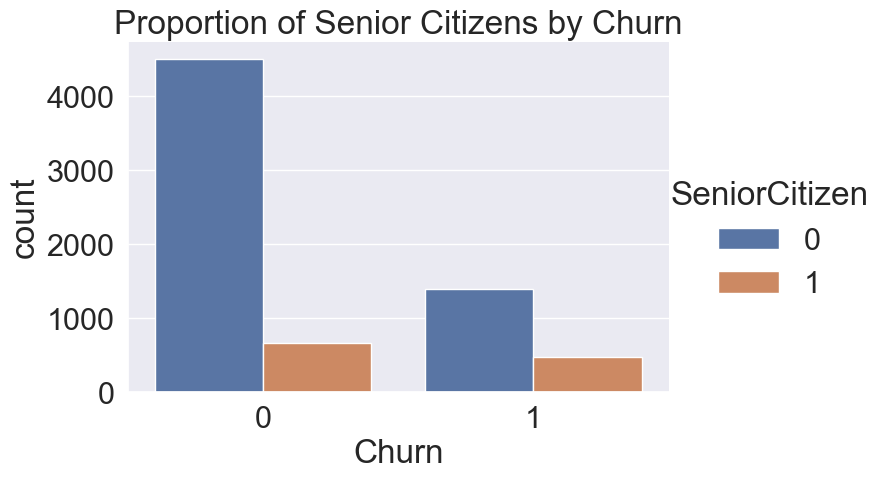

In [86]:
# Needed to convert SeniorCitizen column to a string for categorical plotting
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

sns.catplot(
    data=df,
    x="Churn",
    hue="SeniorCitizen",
    kind="count",
    height=5,
    aspect=1.5
)
plt.title("Proportion of Senior Citizens by Churn")
plt.show()

**Observation:**

Compared to non-churned consumers, the percentage of older citizens among churned customers (1) is significantly greater. This may suggest that older adults are more prone to leave, perhaps as a result of particular requirements or difficulties.

**4.2 Tenure Distribution**

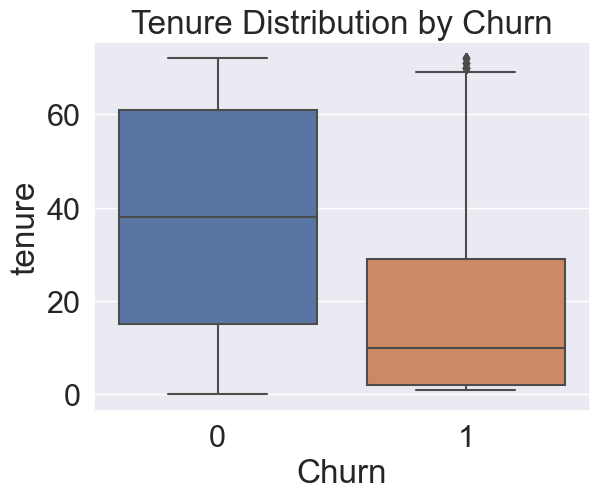

c:\Users\yanks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


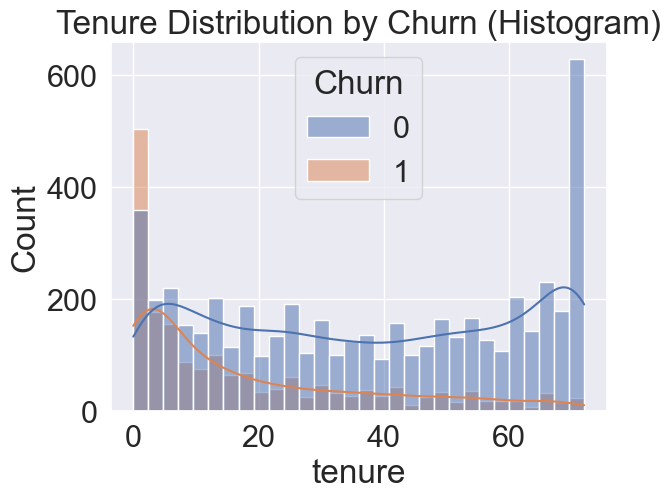

In [87]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure Distribution by Churn")
plt.show()

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure Distribution by Churn (Histogram)")
plt.show()

**Observation:**

**Boxplot**: The duration of churning customers is generally much shorter than that of non-churning customers. This implies that newer clients are more likely to leave, which could be a sign of problems with initial customer happiness or onboarding.

**Histogram**: The histogram demonstrates that longer-tenured customers are less likely to churn, whereas customers with extremely short tenures make up the majority of the turnover group.

**4.3 Monthly Charges Distribution**

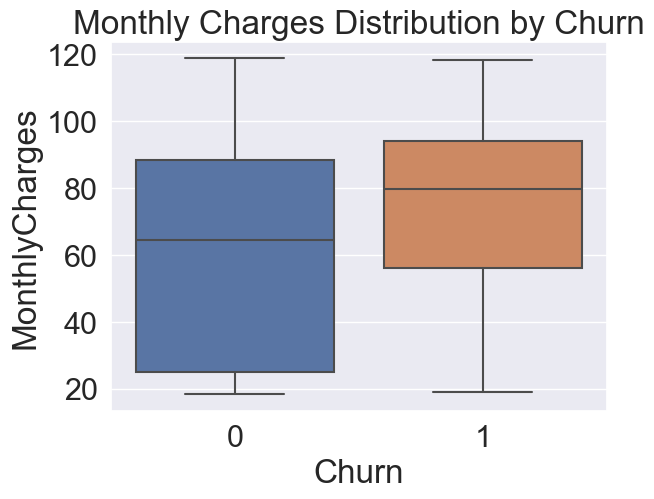

c:\Users\yanks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


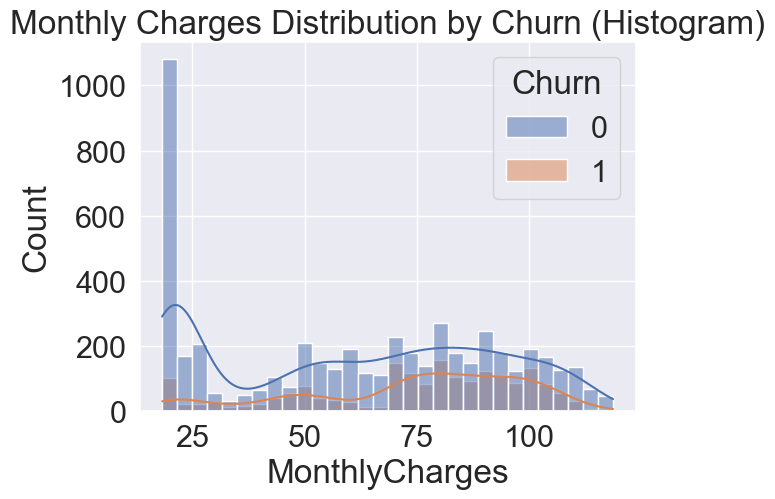

In [88]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges Distribution by Churn")
plt.show()

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Monthly Charges Distribution by Churn (Histogram)")
plt.show()

**Obervation**

**Boxplot**: On average, monthly charges for churned clients are higher than those for non-churned customers. This could imply that turnover decisions may be influenced by pricing.

**Histogram**: Customers with monthly payments at specific higher price points exhibit a jump in churn, highlighting the necessity of further research into pricing options.

**4.4 Total Charges Distribution**

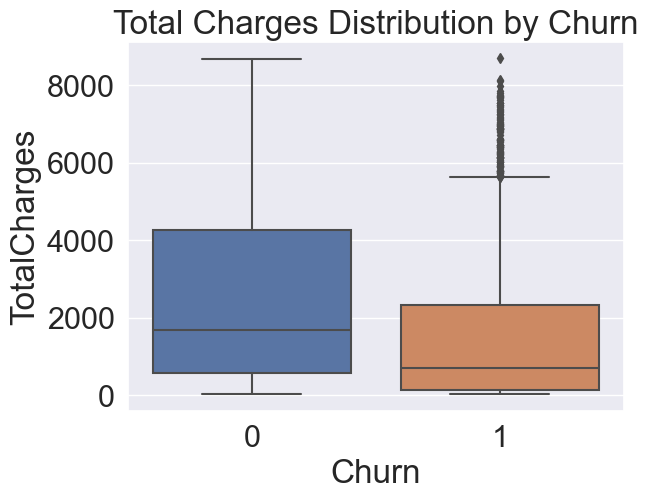

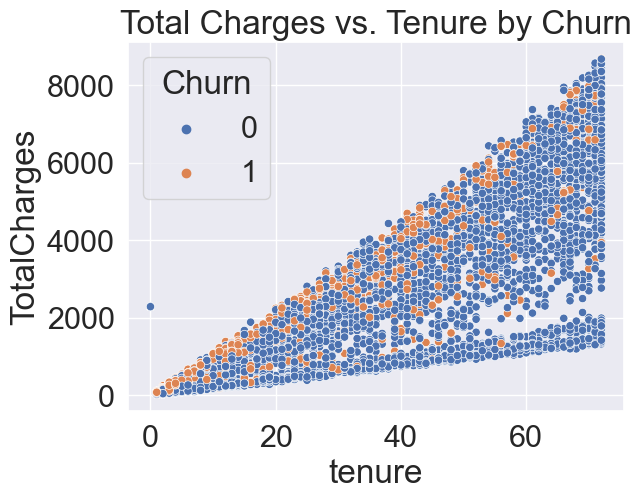

In [47]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Total Charges Distribution by Churn")
plt.show()

sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
plt.title("Total Charges vs. Tenure by Churn")
plt.show()

**Obervation**:

**Boxplot**: Because churned clients have a shorter tenure than non-churned customers, their total charges are typically lower.

**Total Charges vs. Tenure by Churn Scatterplot**: There is a definite linear correlation between tenure and total charges. The notion that churn is more common among new customers is supported by the fact that the majority of churned customers are concentrated at lower tenure and lower total costs.

**Gerneral Information**

**Tenure** and **Total Charges** are strong indicators of churn, with newer customers and those with lower total charges being at higher risk.

**Senior Citizen** and **Monthly Charges** might also be factors worth investigating further to develop targeted retention strategies.

# **5 Inferential Statistics**

**5.1 Hypothesis Testing**

In [92]:
# T-test for Monthly Charges
from scipy.stats import ttest_ind

churned = df[df['Churn'] == 1]['MonthlyCharges'] # Churned
not_churned = df[df['Churn'] == 0]['MonthlyCharges'] # Not Churned

# Perform the t-test
stat, p_value = ttest_ind(churned, not_churned)
print(f"T-test: stat={stat}, p={p_value}")

# Check if the p-value is less than 0.05 to determine statistical significance
if p_value < 0.05:
    print("Statistically significant difference between groups.")
else:
    print("No statistically significant difference between groups.")

T-test: stat=16.536738015936308, p=2.7066456068884154e-60
Statistically significant difference between groups.


**Observation**

The p-value is significantly smaller than the alpha level of 0.05. This indicates that there is a statistically significant difference in the MonthlyCharges between churned and non-churned customers.

Customers who churn seem to have higher MonthlyCharges on average compared to those who stay, suggesting that MonthlyCharges might play a key role in customer churn.

**5.2 Additional Statistical Tests**

Chi-Square Test for Categorical Variables

Perform an ANOVA test for more than two groups.

In [93]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print Results
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant association between SeniorCitizen and Churn.")
else:
    print("No statistically significant association between SeniorCitizen and Churn.")

Chi2 Statistic: 159.42630036838742
p-value: 1.510066805092378e-36
Statistically significant association between SeniorCitizen and Churn.


**Observation** 

There is a statistically significant correlation between the SeniorCitizen and Churn features, according to the findings of the Chi-Square test.

This implies that a customer's likelihood of churning is significantly correlated with their age.

**5.3 ANOVA Test**

In [94]:
from scipy.stats import f_oneway
# MonthlyCharges by Contract Type

# Split the data by Contract type
month_to_month = df[df['Contract'] == 'Month-to-month']['MonthlyCharges']
one_year = df[df['Contract'] == 'One year']['MonthlyCharges']
two_year = df[df['Contract'] == 'Two year']['MonthlyCharges']

# Perform ANOVA
stat, p_value = f_oneway(month_to_month, one_year, two_year)

# Print Results
print(f"F-statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant differences between groups.")
else:
    print("No statistically significant differences between groups.")

F-statistic: 20.828045474730274
p-value: 9.575270975935273e-10
Statistically significant differences between groups.


**Observation** 

There is a statistically significant difference in the Monthly Charges between customers with different contract types (Month-to-month, One year, Two year).

This implies that a customer's monthly fees are influenced by the kind of contract they have.

# **6. Feature Selection and Engineering**

**6.1 Handling Categorical Data**

In [99]:
# Applying one-hot encoding to categorical variables into numerical reppresentations suitable for machine learning in the future
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

**6.2 Handling Missing Values**

In [101]:
# Impute missing values only for numeric columns
df.fillna(df.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

**6.3 Normalization/Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])